
# PROJECT
## SMS Spam Collection

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Bags of Word Approach](#section4)<br>
5. [Model building](#section5)<br>
    - 5.1 [Create a user-defined function to fit and predict the model](#section501)<br>
    - 5.2 [Create a user-defined function for evaluation purpose](#section502)<br>
    - 5.3 [Model building using Logistic Regression algorithm and its evaluation](#section503)<br>
    - 5.4 [Model building using Naive Bayes algorithm and its evaluation](#section504)<br>
    - 5.5 [Model building using Decision Tree classifier and its evaluation](#section505)<br>
    - 5.6 [Model building using  Random Forest classifier and its evaluation](#section506)<br>
6. [Conclusion](#section6)<br>

<a id="section1"></a>
##  1. PROBLEM STATEMENT

In this assignment we will take an interesting usecase of __NLP__(Natural Language Processing), we won't dig deep into it, but just that much which is required to solve this case-study problem.
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,572 messages, tagged acording being __ham__ (legitimate) or __spam__.

We need to create a model which will detect if an SMS is spam or not spam.

<a id="section2"></a>
##  2. DATA LOADING AND DESCRIPTION

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being __ham__ (legitimate) or __spam__.

The dataset consists of __5572 rows__.<br/>
Below is a table having brief description of features present in the dataset.


|Feature            |	Description                                               |
|---------------    |- ------------                                                | 
| v1	            | Target variable, with only 2 set of values, spam or ham.|
| v2                | Explanatory variable, actual SMS which has to be categorized as spam or ham|                                     

### Import the packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing different evalution metrics 
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score

### Import the dataset

In [2]:
sms = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<a id="section3"></a>
## 3. Exploratory Data Analysis

In [3]:
sms.info()  # Getting the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [4]:
sms['Unnamed: 2'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
5542    NaN
5543    NaN
5544    NaN
5545    NaN
5546    NaN
5547    NaN
5548    NaN
5549    NaN
5550    NaN
5551    NaN
5552    NaN
5553    NaN
5554    NaN
5555    NaN
5556    NaN
5557    NaN
5558    NaN
5559    NaN
5560    NaN
5561    NaN
5562    NaN
5563    NaN
5564    NaN
5565    NaN
5566    NaN
5567    NaN
5568    NaN
5569    NaN
5570    NaN
5571    NaN
Name: Unnamed: 2, Length: 5572, dtype: object>

It has been observed that almost all the values in the other 3 columns are NaN. Hence these columns can be dropped.

**Dropping the unwanted columns Unnamed:2, Unnamed: 3 and Unnamed:4**

In [5]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

**Renaming the column name of v1 to label amd v2 to sms**

In [6]:
sms = sms.rename(columns={"v1":"label", "v2":"sms"})

**Checking the Length of SMS**

In [7]:
print (len(sms))

5572


In [8]:
sms.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


__Number of observations(spam and ham) in each label__

In [9]:
sms['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


It can be seen that the SMS with the content 'Sorry, I'll call later' is occurring most in the dataset. This SMS is generally used when the sender is busy and uses this text.

In [11]:
# Adding one more column which calculates the number of characters to analyze further.
sms['length'] = sms['sms'].apply(len)
sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


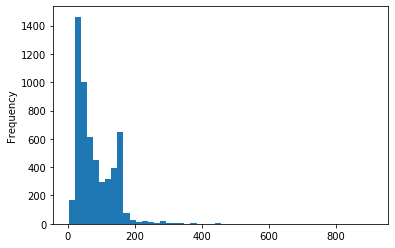

In [12]:
sms['length'].plot(bins=50, kind='hist')

Most of the SMSs are of length varying between 20-150 characters.
Further breaking the SMS into spam and ham and analyzing the length.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8CC071198>,
      dtype=object)

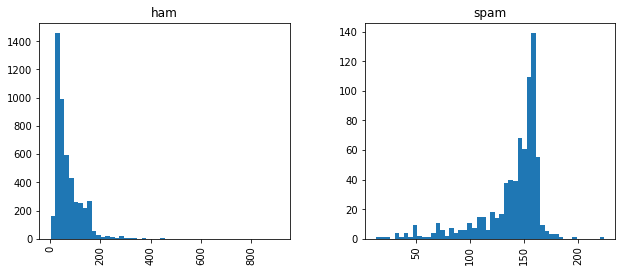

In [13]:
sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In the given dataset, most of the ham SMS are of length 10-180.
However, spam SMS are generally 100-180 characters long.
ham's graph is right skewed but spam's graph is left skewed.

In [14]:
# Converting spam values to 1 and ham values to 0
sms.loc[:,'label'] = sms.label.map({'ham':0, 'spam':1})
print(sms.shape)
sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


<a id="section4"></a>
## 4. Bag of Words Approach

What we have here in our data set is a large collection of text data (5,572 rows of data). <br/>Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy.
We need a way to represent text data for machine learning algorithm and the __bag-of-words__ model helps us to achieve that task.
- It is a way of __extracting features from the text__ for use in machine learning algorithms.
- In this approach, we use the tokenized words for each observation and find out the frequency of each token.
- Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.


__Understanding the approach using an example:__


Lets say we have 4 documents as follows:

**['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']**

Our objective here is to convert this set of text to a frequency distribution matrix, as follows:
<img src="https://image.ibb.co/casG7U/countvectorizer.png" alt="table">

Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns count vectorizer method which does the following:

1.  It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
2. It counts the occurrence of each of those tokens.

**Implementation of Bag of Words Approach**

Step 1: __Convert all strings to their lower case form.__

In [15]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)


['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


Step 2: __Removing all punctuations__

In [16]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

Step 3: __Tokenization__

In [17]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

Step 4: __Count frequencies__

In [18]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


### Implementing Bag of Words in scikit-learn

**Data preprocessing with CountVectorizer()**

In above step, we implemented a version of the CountVectorizer() method from scratch that entailed cleaning our data first.
- This cleaning involved converting all of our data to lower case and removing all punctuation marks.
- CountVectorizer() has certain __parameters__ which take care of these steps for us. They are:
        - lowercase = True  
        The lowercase parameter has a default value of True which converts all of our text to its lower case form.
        
        - token_pattern = (?u)\\b\\w\\w+\\b 
        The token_pattern parameter has a default regular expression value of -
        (?u)\\b\\w\\w+\\b which ignores all punctuation marks and treats them as delimiters, while accepting
        alphanumeric strings of length greater than or equal to 2, as individual tokens or words.
        
        - stop_words 
        The stop_words parameter, if set to english will remove all words from our document set that match a 
        list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact 
        that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this 
        parameter value.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [20]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [21]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [22]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


Lets take the second row of the document, i.e., '__Win money, win from home.__' .<br/>Now by observing the second row of the frequency matrix, you can learn how values of individual element is set in the matrix.

|__Word__ | __Frequency__  |
| -------|:------      :| 
|from    | 1            |
|home    | 1            |
|money   | 1            |
|win     | 2            |

<a id="section5"></a>
## 5. Model Building 

__Back to our orignal SMS dataset__

### Extract the dependent variables to create a dataframe X.

In [23]:
X = pd.DataFrame()
def generate():
    X = sms['sms']
    return X
X = generate()

In [24]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: sms, dtype: object

### Extract the independent variable into a dataframe 'y' for model prediction.

In [25]:
y = pd.DataFrame()
def generate():
    y = sms['label']
    return y
y = generate()

### Split X and y into train and test dataset with test_size = 0.20, random_state=0.

In [26]:
from sklearn.model_selection import train_test_split
def generate():
    return train_test_split(sms['sms'], sms['label'], test_size=0.20, random_state=0 )
X_train, X_test, y_train, y_test = generate()

###  Check the shape of X and y of train dataset

In [27]:
def generate():
    print(X_train.shape)
    print(y_train.shape)
    return
generate()

(4457,)
(4457,)


###  Check the shape of X and y of test dataset

In [28]:
def generate():
    print(X_test.shape)
    print(y_test.shape)
    return
generate()

(1115,)
(1115,)


__Instantiate the CountVectorizer method__

In [29]:
count_vector = CountVectorizer()

__Fit the model to X_train and obtaining the transformed X_train__

In [30]:
training_data = count_vector.fit_transform(X_train)

__Transform testing data and return the matrix.__

In [31]:
testing_data = count_vector.transform(X_test)

Here in this case, if prediction from model indicates the SMS to be spam but actually it's not spam, that model is not correct. In this case, an important SMS may be lost if model predicts that ham to be spam.
Hence our false positives should be as low as possible.
And to decrease the false positive, precision should be high. 

<a id="section501"></a>
###  Create a user-defined function to fit and predict the model.

In [32]:
def get_predictions(clf, training_data, y_train, testing_data):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(training_data, y_train)
    # predict using test data
    y_pred = clf.predict(testing_data)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(testing_data)
    return y_pred, y_pred_prob

<a id="section502"></a>
###  Create a user-defined function for evaluation purpose.

In [33]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

<a id="section503"></a>
### Model building using Logistic Regression algorithm and its evaluation

In [34]:
y_pred, y_pred_prob = get_predictions(LogisticRegression(), training_data, y_train, testing_data)
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[947   2]
 [ 24 142]]
recall score:  0.8554216867469879
precision score:  0.9861111111111112
f1 score:  0.9161290322580645
accuracy score:  0.9766816143497757
ROC AUC: 0.995302601343202


C:\Users\91900\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<a id="section504"></a>
### Model building using Naive Bayes algorithm and its evaluation

Specifically, we will be using the **multinomial Naive Bayes** implementation. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand **Gaussian Naive Bayes** is better suited for continuous data as it assumes that the input data has a Gaussian(normal) distribution.

In [35]:
y_pred, y_pred_prob = get_predictions(MultinomialNB(), training_data, y_train, testing_data)
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[947   2]
 [ 12 154]]
recall score:  0.927710843373494
precision score:  0.9871794871794872
f1 score:  0.9565217391304347
accuracy score:  0.9874439461883409
ROC AUC: 0.9871710233981236


<a id="section505"></a>
### Model building using Decision Tree classifier and its evaluation

In [36]:
y_pred, y_pred_prob = get_predictions(DecisionTreeClassifier(), training_data, y_train, testing_data)
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[932  17]
 [ 21 145]]
recall score:  0.8734939759036144
precision score:  0.8950617283950617
f1 score:  0.8841463414634145
accuracy score:  0.9659192825112107
ROC AUC: 0.9277901913237777


<a id="section506"></a>
### Model building using  Random Forest classifier and its evaluation

In [37]:
y_pred, y_pred_prob = get_predictions(RandomForestClassifier(), training_data, y_train, testing_data)
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[949   0]
 [ 42 124]]
recall score:  0.7469879518072289
precision score:  1.0
f1 score:  0.8551724137931034
accuracy score:  0.9623318385650225
ROC AUC: 0.9810390138001955


C:\Users\91900\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<a id="section6"></a>
## 6. Conclusion

We have compared the performance of the 4 models using various model evaluation techinques.
In this case, we are mainly concerned with high false postive and this try to be minimized. 

Precision for model1(Using LogisticRegression) is: 0.9861
Precision for model2(Using Naive Bayes) is: 0.98717
Precision for model3(Using Decision Tree classifier) is: 0.89506
Precision for model4(Using RandomForestClassifier) is: 1

It is observed that precision is highest in the testing data when Random Forest alogorithm is used.
False positive is 0.

When Naive bayes algoritm is used, precision is very high(=0.98717) and false positives is 2.
Hence, it can be concluded that for this dataset, Random Forest Classifier should be used.